In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import pandas as pd
import util.utilities as util
from collections import Counter

In [2]:
pd.set_option('display.max_colwidth',255)
df_sms_extraction = util.load_dataset(my_path='../../dataset/Extraction_form_basic.xlsx')
df_sms_extraction = util.add_column_sp(df_sms_extraction)

# Q4 Tools and Methods

In [3]:
# 3.5) Q4 Tools and Methods

dict_q4 = {}
for item in zip( list(df_sms_extraction['Paper Id']), list(df_sms_extraction['Q4(Techniques and tools)']) ):
    id = item[0]
    if (item[1] != ''):
        q4 = str(item[1])
        q4 = ' '.join(q4.split())
        dict_q4[id] = q4.lower()
dict_q4

{1: 'general:"model-driven architecture approach, natural language processing, machine learning, heterogeneous artefacts" # approuch:"rebel focuses on finding atd items at architecture level only, measuring the impact of its repayment strategy based on architecture decisions and allowing the debt to be anticipated or corrected before the implementation process begins # tools:"rebel"',
 2: 'general:"specialist technical evaluation, modularity, measurement system, complexity, cohesion, coupling, code churn, source code, revision history" # approuch:"own technique to identify, measure and calculate the atd" # tools:"proprietary tool"',
 3: 'general:"architecture smells, modularity" # approuch:"unstable dependency, hub-like dependency, cyclic dependency, implicit cross package dependency, " # tools:"arcan, sonarqube, apache commons bcel, hellow2morrow"',
 4: 'general:"architectural root, source code, revision history, design structure matrix, code churn, change frequency, architectural sme

## Tools

In [4]:
## Q4.1 Tools

list_of_tat, list_of_techniques, list_of_approaches, list_of_tools = util.extract_techniques_approuches_tools(df_sms_extraction, column_name="Q4(Techniques and tools)")

print("List of tools: ")
list_of_tools.sort()
print(list_of_tools)

list_of_tools = Counter(list_of_tools).most_common()

List of tools: 
[' ', ' ', "  'Titan'", '  latix', ' "ACME-Generator Tool"', ' "Arcan"', ' "ArchDia"', ' "DV8"', ' "No"', ' "Rebel"', ' "Skuld"', ' "SonarQube"', ' "Sonargraph"', ' "Sonarqube"', ' "Sonarqube"', ' "no"', ' "no"', ' "no"', ' "no"', ' "proprietary formula"', ' "proprietary formulas"', ' "proprietary tool to visualize dependency among components"', ' "proprietary tool"', ' "proprietary tool"', ' "proprietary tool"', ' "proprietary tool"', ' "proprietary"', ' "proprietary"', ' "proprietary"', ' "proprietary"', ' "proprietary"', ' "proprietary"', ' "questionaries"', " 'Arcan'", ' Understand', '""', 'ASTracker', 'Apache Commons BCEL', 'Arcan', 'Arcan', 'CAST', 'CAST', 'Cast', 'Checkstyle', 'CodeCov', 'DV8', 'Error Prone', 'Findbugs', 'Fusion', 'FxCorp', 'Git', 'GraphML', 'InFusion', 'Jira', 'Jmetrics', 'Lattix', 'PMD', 'Self-made tool', 'Simian', 'SonarGraph', 'SonarQube', 'SonarQube', 'SonarQube', 'SonarQube Structure101', 'Sonargraph', 'Sonarqube', 'Titan', 'Understand', 'U

In [5]:
list_of_main_tools = ['SonarQube', 'Arcan','CAST', 'Understand', 'ACME-Generator Tool', 'ArchDia','DV8', 'Rebel', 'Sonargraph',
 'Understand','ASTracker','Apache Commons BCEL', 'Checkstyle','CodeCov', 'Error Prone', 'Findbugs',
 'Fusion', 'FxCorp', 'GraphML', 'InFusion', 'Jmetrics', 'Lattix','PMD','Simian','Structure101', 'Titan',
 'dependency-analyser','hellow2morrow','titan', 'skuld']

list_of_main_tools = [each.lower() for each in list_of_main_tools]
print(list_of_main_tools)

['sonarqube', 'arcan', 'cast', 'understand', 'acme-generator tool', 'archdia', 'dv8', 'rebel', 'sonargraph', 'understand', 'astracker', 'apache commons bcel', 'checkstyle', 'codecov', 'error prone', 'findbugs', 'fusion', 'fxcorp', 'graphml', 'infusion', 'jmetrics', 'lattix', 'pmd', 'simian', 'structure101', 'titan', 'dependency-analyser', 'hellow2morrow', 'titan', 'skuld']


In [6]:
list_of_other_tools = ['no', 'proprietary tool','proprietary formula', 'proprietary formulas', 
'proprietary tool to visualize dependency among components', 'questionaries']

print(list_of_other_tools)

['no', 'proprietary tool', 'proprietary formula', 'proprietary formulas', 'proprietary tool to visualize dependency among components', 'questionaries']


In [7]:
list_of_papers_with_tools = []
for each in list_of_main_tools: 
    j = 0
    for item in list(df_sms_extraction['Q4(Techniques and tools)']):
        teste = each
        if ('No' not in item and 'no' not in item):
            list_temp = item.split("#")
            if ( teste in list_temp[2].lower()): 
                list_of_papers_with_tools.append( (df_sms_extraction['Paper Id'].iloc[j], teste) )
        j = j + 1

list_of_papers_with_tools = list(set(list_of_papers_with_tools))
print(list_of_papers_with_tools)

[(14, 'acme-generator tool'), (20, 'dependency-analyser'), (7, 'dv8'), (44, 'cast'), (108, 'sonarqube'), (51, 'astracker'), (48, 'understand'), (73, 'fxcorp'), (44, 'infusion'), (3, 'hellow2morrow'), (44, 'sonargraph'), (5, 'dv8'), (51, 'graphml'), (91, 'error prone'), (7, 'understand'), (91, 'findbugs'), (91, 'jmetrics'), (115, 'arcan'), (7, 'simian'), (44, 'structure101'), (3, 'arcan'), (107, 'skuld'), (91, 'sonarqube'), (38, 'titan'), (91, 'checkstyle'), (1, 'rebel'), (91, 'lattix'), (48, 'titan'), (17, 'fusion'), (17, 'sonargraph'), (13, 'titan'), (3, 'sonarqube'), (44, 'sonarqube'), (78, 'understand'), (91, 'cast'), (15, 'sonargraph'), (91, 'codecov'), (30, 'arcan'), (3, 'apache commons bcel'), (81, 'cast'), (28, 'sonarqube'), (48, 'sonarqube'), (51, 'arcan'), (44, 'fusion'), (17, 'sonarqube'), (4, 'archdia'), (91, 'pmd'), (109, 'sonarqube'), (13, 'understand')]


In [8]:
# 1) Add new column grouped_by_tools
df_sms_extraction['grouped_by_tools'] = None

grouped_by_tools = list_of_papers_with_tools
# 2) Updating df_sms_extraction['grouped_by_tools']
i = 0
list_tool_aux = []
for item in df_sms_extraction['Paper Id']:
    for each in grouped_by_tools:
        if each[0] == item:
            list_tool_aux.append(each[1])           
    df_sms_extraction['grouped_by_tools'].iloc[i] = list_tool_aux
    i = i + 1
    list_tool_aux = []

df_sms_extraction[['Paper Id', 'sp', 'grouped_by_tools']]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Paper Id,sp,grouped_by_tools
0,1,SP1,[rebel]
1,2,SP2,[]
2,3,SP3,"[hellow2morrow, arcan, sonarqube, apache commons bcel]"
3,4,SP4,[archdia]
4,5,SP5,[dv8]
5,7,SP6,"[dv8, understand, simian]"
6,9,SP7,[]
7,10,SP8,[]
8,13,SP9,"[titan, understand]"
9,14,SP10,[acme-generator tool]


In [9]:
# 3) Creating list_by_tools using count 
list_by_tools = []
for each in grouped_by_tools: 
    list_by_tools.append(each[1])

list_by_tools = Counter(list_by_tools).most_common()
list_by_tools

[('sonarqube', 8),
 ('understand', 4),
 ('arcan', 4),
 ('cast', 3),
 ('sonargraph', 3),
 ('titan', 3),
 ('dv8', 2),
 ('fusion', 2),
 ('acme-generator tool', 1),
 ('dependency-analyser', 1),
 ('astracker', 1),
 ('fxcorp', 1),
 ('infusion', 1),
 ('hellow2morrow', 1),
 ('graphml', 1),
 ('error prone', 1),
 ('findbugs', 1),
 ('jmetrics', 1),
 ('simian', 1),
 ('structure101', 1),
 ('skuld', 1),
 ('checkstyle', 1),
 ('rebel', 1),
 ('lattix', 1),
 ('codecov', 1),
 ('apache commons bcel', 1),
 ('archdia', 1),
 ('pmd', 1)]

In [10]:
# 4) Creating DataFrame df_my_tools
tools = []
count = []
for each in list_by_tools: 
    tools.append(each[0])
    count.append(each[1])

my_tools = {'tools': tools, 'count':count}
my_tools
my_tools_id = list(range(1,len(list_by_tools)+1))
my_tools_id

df_my_tools = pd.DataFrame(data=my_tools, index=my_tools_id)
df_my_tools.reset_index(drop=True, inplace=True)
df_my_tools['sp'] = None

# 5) Add new column with Selected Papers according grouped tools
i = 0
for each in df_my_tools['tools']:
    list_sp_novo = []
    j = 0
    for item in df_sms_extraction['grouped_by_tools']:
        if each in item: 
            list_sp_novo.append(df_sms_extraction['sp'].iloc[j])
        j = j + 1
    df_my_tools['sp'].iloc[i] = list_sp_novo
    i = i + 1

# 6) Save the latex table 
util.create_latex_table(my_df=df_my_tools, my_path='../../latex', my_file_name='mytable_q4_distribution_detailed.tex')

df_my_tools

Arquivo ../../latex/mytable_q4_distribution_detailed.tex  gerado com sucesso!


,tools,count,sp
0,sonarqube,8,"[SP3, SP13, SP19, SP24, SP26, SP44, SP49, SP50]"
1,understand,4,"[SP6, SP9, SP19, SP39]"
2,arcan,4,"[SP3, SP17, SP28, SP56]"
3,cast,3,"[SP26, SP40, SP44]"
4,sonargraph,3,"[SP11, SP13, SP26]"
5,titan,3,"[SP9, SP18, SP19]"
6,dv8,2,"[SP5, SP6]"
7,fusion,2,"[SP13, SP26]"
8,acme-generator tool,1,[SP10]
9,dependency-analyser,1,[SP21]


In [11]:
list_of_tools = list(df_my_tools['tools'])
list_of_tools

['sonarqube',
 'understand',
 'arcan',
 'cast',
 'sonargraph',
 'titan',
 'dv8',
 'fusion',
 'acme-generator tool',
 'dependency-analyser',
 'astracker',
 'fxcorp',
 'infusion',
 'hellow2morrow',
 'graphml',
 'error prone',
 'findbugs',
 'jmetrics',
 'simian',
 'structure101',
 'skuld',
 'checkstyle',
 'rebel',
 'lattix',
 'codecov',
 'apache commons bcel',
 'archdia',
 'pmd']

In [12]:
## Other tools

list_of_papers_with_other_tools = []
for each in list_of_other_tools: 
    j = 0
    for item in list(df_sms_extraction['Q4(Techniques and tools)']):
        teste = each
        if ('No' not in item and 'no' not in item):
            list_temp = item.split("#")
            if ( teste in list_temp[2].lower()): 
                list_of_papers_with_other_tools.append( (df_sms_extraction['Paper Id'].iloc[j], teste) )
        j = j + 1

list_of_papers_with_other_tools = list(set(list_of_papers_with_other_tools))
print(list_of_papers_with_other_tools)

[(31, 'proprietary tool to visualize dependency among components'), (43, 'proprietary tool'), (31, 'proprietary tool'), (81, 'proprietary formula'), (33, 'proprietary tool'), (90, 'proprietary tool'), (20, 'proprietary tool'), (2, 'proprietary tool'), (27, 'proprietary formula')]


In [13]:
# 1) Add new column grouped_by_other_tools
df_sms_extraction['grouped_by_other_tools'] = None

grouped_by_other_tools = list_of_papers_with_other_tools
# 2) Updating df_sms_extraction['grouped_by_other_tools']
i = 0
list_tool_aux = []
for item in df_sms_extraction['Paper Id']:
    for each in grouped_by_other_tools:
        if each[0] == item:
            list_tool_aux.append(each[1])           
    df_sms_extraction['grouped_by_other_tools'].iloc[i] = list_tool_aux
    i = i + 1
    list_tool_aux = []

df_sms_extraction[['Paper Id', 'sp', 'grouped_by_other_tools']]

,Paper Id,sp,grouped_by_other_tools
0,1,SP1,[]
1,2,SP2,[proprietary tool]
2,3,SP3,[]
3,4,SP4,[]
4,5,SP5,[]
5,7,SP6,[]
6,9,SP7,[]
7,10,SP8,[]
8,13,SP9,[]
9,14,SP10,[]


In [14]:
# 3) Creating list_by_other_tools using count 
list_by_other_tools = []
for each in grouped_by_other_tools: 
    list_by_other_tools.append(each[1])

list_by_other_tools = Counter(list_by_other_tools).most_common()

# 4) Creating DataFrame df_my_tools
other_tools = []
count = []
for each in list_by_other_tools: 
    other_tools.append(each[0])
    count.append(each[1])
    
my_other_tools = {'other_tools': other_tools, 'count':count}
my_other_tools
my_other_tools_id = list(range(1,len(list_by_other_tools)+1))
my_other_tools_id

df_my_other_tools = pd.DataFrame(data=my_other_tools, index=my_other_tools_id)
df_my_other_tools.reset_index(drop=True, inplace=True)
df_my_other_tools['sp'] = None

# 5) Add new column with Selected Papers according grouped tools
i = 0
for each in df_my_other_tools['other_tools']:
    list_sp_novo = []
    j = 0
    for item in df_sms_extraction['grouped_by_other_tools']:
        if each in item: 
            list_sp_novo.append(df_sms_extraction['sp'].iloc[j])
        j = j + 1
    df_my_other_tools['sp'].iloc[i] = list_sp_novo
    i = i + 1

# 6) Save the latex table 
util.create_latex_table(my_df=df_my_other_tools, my_path='../../latex', my_file_name='mytable_q4_other_distribution_detailed.tex')

# 7) Save the markdown table 
util.create_markdown_table(my_df=df_my_other_tools, my_path='../../md', my_file_name='mytable_q4_other_distribution_detailed.md')

df_my_other_tools

Arquivo ../../latex/mytable_q4_other_distribution_detailed.tex  gerado com sucesso!
Arquivo ../../md/mytable_q4_other_distribution_detailed.md  gerado com sucesso!


,other_tools,count,sp
0,proprietary tool,6,"[SP2, SP21, SP22, SP25, SP27, SP43]"
1,proprietary formula,2,"[SP16, SP40]"
2,proprietary tool to visualize dependency among components,1,[SP25]


## Merge of Tools and Proprietary tools

In [15]:
## Merge of Tools and Owner tool

list_of_other_tools_merged = []
for each in df_my_other_tools['sp'].values:
    for item in each: 
        list_of_other_tools_merged.append(item)
print(f'list_of_other_tools_merged: {list_of_other_tools_merged}')
print('')

new_tools = []
new_count = []
new_sp = []

new_tools = list(df_my_tools['tools'])
new_tools.append('other')
tools = new_tools

new_count = list(df_my_tools['count'])
new_count.append(len(list_of_other_tools_merged)) 
count = new_count

new_sp = list(df_my_tools['sp'])
new_sp.append(list_of_other_tools_merged)
sp = new_sp

my_tools = {'tools': tools, 'count':count, 'sp': sp}
my_tools_id = list(range(1,len(tools)+1))

pd.set_option('display.max_colwidth',400)
df_my_tools = pd.DataFrame(data=my_tools, index=my_tools_id)
df_my_tools.reset_index(drop=True, inplace=True)

# 6) Save the latex table 
util.create_latex_table(my_df=df_my_tools, my_path='../../latex', my_file_name='mytable_q4_tools_and_other_distribution_detailed.tex')

util.create_markdown_table(my_df=df_my_tools, my_path='../../md', my_file_name='mytable_q4_tools_and_other_distribution_detailed.md')

df_my_tools

list_of_other_tools_merged: ['SP2', 'SP21', 'SP22', 'SP25', 'SP27', 'SP43', 'SP16', 'SP40', 'SP25']

Arquivo ../../latex/mytable_q4_tools_and_other_distribution_detailed.tex  gerado com sucesso!
Arquivo ../../md/mytable_q4_tools_and_other_distribution_detailed.md  gerado com sucesso!


,tools,count,sp
0,sonarqube,8,"[SP3, SP13, SP19, SP24, SP26, SP44, SP49, SP50]"
1,understand,4,"[SP6, SP9, SP19, SP39]"
2,arcan,4,"[SP3, SP17, SP28, SP56]"
3,cast,3,"[SP26, SP40, SP44]"
4,sonargraph,3,"[SP11, SP13, SP26]"
5,titan,3,"[SP9, SP18, SP19]"
6,dv8,2,"[SP5, SP6]"
7,fusion,2,"[SP13, SP26]"
8,acme-generator tool,1,[SP10]
9,dependency-analyser,1,[SP21]


In [16]:
df_temp = df_my_tools.query('count >= 2')[['tools', 'count']]
df_temp

,tools,count
0,sonarqube,8
1,understand,4
2,arcan,4
3,cast,3
4,sonargraph,3
5,titan,3
6,dv8,2
7,fusion,2
28,other,9


In [17]:
my_total = 57
for each in df_temp.values:
    my_tools = each[0]
    my_count = each[1]
    print('{} {}\% ({} studies)'.format(my_tools, round(my_count*100/my_total , 2), my_count ))

sonarqube 14.04\% (8 studies)
understand 7.02\% (4 studies)
arcan 7.02\% (4 studies)
cast 5.26\% (3 studies)
sonargraph 5.26\% (3 studies)
titan 5.26\% (3 studies)
dv8 3.51\% (2 studies)
fusion 3.51\% (2 studies)
other 15.79\% (9 studies)


## Novas características das ferramentass

In [18]:
list_of_tools

['sonarqube',
 'understand',
 'arcan',
 'cast',
 'sonargraph',
 'titan',
 'dv8',
 'fusion',
 'acme-generator tool',
 'dependency-analyser',
 'astracker',
 'fxcorp',
 'infusion',
 'hellow2morrow',
 'graphml',
 'error prone',
 'findbugs',
 'jmetrics',
 'simian',
 'structure101',
 'skuld',
 'checkstyle',
 'rebel',
 'lattix',
 'codecov',
 'apache commons bcel',
 'archdia',
 'pmd']

In [19]:
dict_of_features = {'free':'', 'academic':'', 'available':'', 'languages':'', 'notes':''}

list_of_tuple_of_tools = list()
for each in list_of_tools:
    list_of_tuple_of_tools.append((each, dict_of_features))

list_of_tuple_of_tools

[('sonarqube',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('understand',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('arcan',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('cast',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('sonargraph',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('titan',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('dv8',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('fusion',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('acme-generator tool',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('dependency-analyser',
  {'free': '', 'academic': '', 'available': '', 'languages': '', 'notes': ''}),
 ('astracker',
  {'free': '', 'academic': '', 'ava

In [20]:
# Atualizacao manual
list_of_tuple_of_tools = [('sonarqube', {'free': 'Yes', 'academic': 'No', 'available': 'Yes', 'languages': 'ABAP, Apex, C, C#, C++, CSS, COBOL, Flex, Go, HTML, Java, JavaScript, Kotlin, Objective-C, PHP, PLI, PL/SQL, Python, Ruby, Scala, Swift, TSQL, TypeScript, VB.NET, Visual Basic 6, XML', 'notes': 'A continuous inspection engine that finds vulnerabilities, bugs and code smells. Also tracks code complexity, unit test coverage and duplication.'}),
 ('understand', {'free': 'No', 'academic': 'No', 'available': 'Yes', 'languages': 'Ada, Cobol, Ansi C, K&R C, Ansi C++, C#, FORTRAN, Java, Jovial, Pascal, PL/M, Python, VHDL, Objective C/C++, HTML, PHP, JavaScript, XML', 'notes': 'A multi-platform tool for code analysis and comprehension of large code bases.'}),
 ('arcan', {'free': 'Yes', 'academic': 'Yes', 'available': 'Yes', 'languages': 'java', 'notes': 'Based on code analysis to identify architecture smells'}),
 ('cast', {'free': 'No', 'academic': 'No', 'available': 'Yes', 'languages': '', 'notes': ''}),
 ('sonargraph', {'free': 'No', 'academic': 'No', 'available': 'Yes', 'languages': 'Java, C#, Python 3 and C/C++', 'notes': 'static code analyzer that allows you to monitor a software system for technical quality and enforce rules regarding software architecture, metrics and other aspects in all stages of the development process. The Sonargraph platform supports Java, C#, Python 3 and C/C++ out of the box and includes powerful features like a Groovy based scripting engine and a DSL (domain specific language) to describe software architecture.'}),
 ('dv8', {'free': 'No', 'academic': 'No', 'available': 'Yes', 'languages': '', 'notes': 'Measure your system using state-of-the-art architecture metrics suite: Decoupling Level (DL) and Propagation Cost (PC). Monitor the degradation, variation, and evolution of software projects. Compare and contrast with an industrial benchmark. Detect design flaws responsible for ever-increasing maintenance costs. Visualize which files are involved in which flaws. Diagnose flaws to improve your architecture. Calculate the maintenance costs incurred by each design flaw. Estimate the penalty caused by design debts. Estimate Return-on-Investment (ROI) of refactoring'}),
 ('checkstyle', {'free': 'Yes', 'academic': 'No', 'available': 'Yes', 'languages': '', 'notes': 'Besides some static code analysis, it can be used to show violations of a configured coding standard.'}),
 ('graphml', {'free': 'Yes', 'academic': 'No', 'available': 'Yes', 'languages': 'Any language', 'notes': 'XML-based file format for graphs.'}),
 ('structure101', {'free': 'No', 'academic': 'No', 'available': 'Yes', 'languages': 'Java, .Net, C/C++, Python, Objective-C', 'notes': 'Live visualization of code dependencies in the context of the overall architecture. Tangles and spec violations are highlighted as they happen – good structure becomes second nature. See how project/modules and packages use each other – drill down to code-level details. Create project/module groups, layering and visibility constraints – common architecture for the team. Find violations and over-complexity'}),
 ('findbugs', {'free': 'Yes', 'academic': 'No', 'available': 'Yes', 'languages': '', 'notes': ' Based on Jakarta BCEL from the University of Maryland'}),
 ('rebel', {'free': 'No', 'academic': 'Yes', 'available': 'No', 'languages': 'No', 'notes': 'Use analysis of documents of software architecture and model driven analysis'}),
 ('lattix', {'free': 'No', 'academic': 'No', 'available': 'Yes', 'languages': 'Multi-language', 'notes': 'Introduces integrated processing that facilitates the discovery and organization of architectural issues. Architectural concerns can now be discovered without knowledge of the code. Understand the detailed dependency of each low-level element. Decomposition hierarchy allows for massive scalability. Redesign systems and generate work list. Design rules allow precise specification of layers and componentization. Control how third-party libraries are used. Metrics to measure complexity, stability, cyclicality, coupling and other measures. Open API to extend, customize and integrate into the tool chain.'}),
 ('apache commons bcel', {'free': 'Yes', 'academic': 'No', 'available': 'Yes', 'languages': 'Java Bytecode', 'notes': 'The Byte Code Engineering Library (Apache Commons BCEL™) is intended to give users a convenient way to analyze, create, and manipulate (binary) Java class files (those ending with .class). Classes are represented by objects which contain all the symbolic information of the given class: methods, fields and byte code instructions, in particular. Such objects can be read from an existing file, be transformed by a program (e.g. a class loader at run-time) and written to a file again. An even more interesting application is the creation of classes from scratch at run-time. The Byte Code Engineering Library (BCEL) may be also useful if you want to learn about the Java Virtual Machine (JVM) and the format of Java .class files.'}),
 ('error prone', {'free': 'Yes', 'academic': 'No', 'available': 'Yes', 'languages': 'Java', 'notes': 'Error Prone is a static analysis tool for Java that catches common programming mistakes at compile-time.'}),
 ('pmd', {'free': 'Yes', 'academic': 'No', 'available': 'Yes', 'languages': '', 'notes': 'A static ruleset based source code analyzer that identifies potential problems.'}),
 ('skuld', {'free': 'No', 'academic': 'No', 'available': 'No', 'languages': 'Java', 'notes': 'Dashboard with metrics and analytics for both technical and business stakeholders. Retrospective and real-time issue targeting. Monitoring a lot of code metrics and architectural smells'}),
 ('codecov', {'free': 'No', 'academic': 'No', 'available': 'No', 'languages': 'Multi language', 'notes': 'Codecov makes it easy to see absolute coverage and coverage changes overlayed with your source code, making it even easier to identify needed test areas. Regardless of what languages or CI/CDs you use, we can process your code coverage uploads against your entire project. Codecov just works out of the box. Get a summary of coverage information directly in your workflow so that you can add and update tests quickly and effectively. Block underperforming pull requests from being merged with status checks. No more indecision if a code change has enough test coverage. Use badges. '}),
 ('archdia', {'free': 'No', 'academic': 'No', 'available': 'Yes', 'languages': '', 'notes': 'This tool was updated to DV8. Measure your system using state-of-the-art architecture metrics suite: Decoupling Level (DL) and Propagation Cost (PC). Monitor the degradation, variation, and evolution of software projects. Compare and contrast with an industrial benchmark. Detect design flaws responsible for ever-increasing maintenance costs. Visualize which files are involved in which flaws. Diagnose flaws to improve your architecture. Calculate the maintenance costs incurred by each design flaw. Estimate the penalty caused by design debts. Estimate Return-on-Investment (ROI) of refactoring'}),
 ('hellow2morrow', {'free': 'No', 'academic': 'No', 'available': 'Yes', 'languages': 'Java, C#, Python 3 and C/C++', 'notes': 'It was updated to Sonargraph. Static code analyzer that allows you to monitor a software system for technical quality and enforce rules regarding software architecture, metrics and other aspects in all stages of the development process. The Sonargraph platform supports Java, C#, Python 3 and C/C++ out of the box and includes powerful features like a Groovy based scripting engine and a DSL (domain specific language) to describe software architecture.'}), 
 ('jmetrics', {'free': 'Yes', 'academic': 'Yes', 'available': 'Yes', 'languages': 'Java', 'notes': 'It is a Java application designed to analyze other Java applications. It aims to provide some indicators of a Java projects quality. It can analyze both source and byte code to - Extract dependencies between classes and packages in the project. Compute some software Metrics based on those defined by Robert C. Martin in this article. It can then output dependency graphs using the .DOT format and Metrics values using the .CSV format. This work was originally a project carried out by Masters degree students at the University of Bordeaux as part of their studies.'}),
 ('titan', {'free': 'No', 'academic': 'No', 'available': 'No', 'languages': 'Java', 'notes': 'It was developed to automate the collection of architectural information and the calculation of DRSpaces. Titan tool chain that we monitor and manage architecture debt: by tracking the architecture roots, by tracking architecture flaws, and by tracking DL.'}),
 ('fusion', {'free': 'No', 'academic': 'No', 'available': 'No', 'languages': 'No', 'notes': 'It is the same Infusion'}),
 ('infusion', {'free': 'No', 'academic': 'No', 'available': 'No', 'languages': 'No', 'notes': 'Not available'}),
 ('simian', {'free': 'No', 'academic': 'No', 'available': 'Yes', 'languages': 'Java, C#, C, C++, COBOL, Ruby, JSP, ASP, HTML, XML, Visual Basic, Groovy source code and even plain text files.', 'notes': 'Simian (Similarity Analyser) identifies duplication in Java, C#, C, C++, COBOL, Ruby, JSP, ASP, HTML, XML, Visual Basic, Groovy source code and even plain text files. In fact, simian can be used on any human readable files such as ini files, deployment descriptors, you name it. Especially on large enterprise projects, it can be difficult for any one developer to keep track of all the features (classes, methods, etc.) of the system. Simian can be used as part of the build process during development or as a guide when re-factoring. Think of Simian as an independent pair of eyes that will assist in raising the quality of your software.'}),
 ('dependency-analyser', {'free': 'No', 'academic': 'Yes', 'available': 'No', 'languages': 'Multi-language and Document analyser', 'notes': 'Not available'}),
 ('acme-generator tool', {'free': 'No', 'academic': 'No', 'available': 'No', 'languages': 'Not available', 'notes': 'Not available'}), 
 ('astracker', {'free': 'Yes', 'academic': 'Yes', 'available': 'Yes', 'languages': 'Java', 'notes': 'It is a Java tool that parses Arcans output and tracks the architectural smells detected in each versionString analysed by Arcan.'}),
 ('fxcorp', {'free': 'No', 'academic': 'No', 'available': 'No', 'languages': 'Not available', 'notes': 'Not available'})]

In [21]:
list_of_tuple_of_tools

[('sonarqube',
  {'free': 'Yes',
   'academic': 'No',
   'available': 'Yes',
   'languages': 'ABAP, Apex, C, C#, C++, CSS, COBOL, Flex, Go, HTML, Java, JavaScript, Kotlin, Objective-C, PHP, PLI, PL/SQL, Python, Ruby, Scala, Swift, TSQL, TypeScript, VB.NET, Visual Basic 6, XML',
   'notes': 'A continuous inspection engine that finds vulnerabilities, bugs and code smells. Also tracks code complexity, unit test coverage and duplication.'}),
 ('understand',
  {'free': 'No',
   'academic': 'No',
   'available': 'Yes',
   'languages': 'Ada, Cobol, Ansi C, K&R C, Ansi C++, C#, FORTRAN, Java, Jovial, Pascal, PL/M, Python, VHDL, Objective C/C++, HTML, PHP, JavaScript, XML',
   'notes': 'A multi-platform tool for code analysis and comprehension of large code bases.'}),
 ('arcan',
  {'free': 'Yes',
   'academic': 'Yes',
   'available': 'Yes',
   'languages': 'java',
   'notes': 'Based on code analysis to identify architecture smells'}),
 ('cast',
  {'free': 'No',
   'academic': 'No',
   'availabl

In [22]:
df_my_tools['free'] = None
df_my_tools['academic'] = None
df_my_tools['available'] = None
df_my_tools['languages'] = None
df_my_tools['notes'] = None

# 5) Add new column with Selected Papers according grouped tools
i = 0
for each in list_of_tuple_of_tools:
    j = 0
    for item in df_my_tools['tools']:
        if (each[0] == item): 
            df_my_tools['free'].iloc[j] = each[1]['free']
            df_my_tools['academic'].iloc[j] = each[1]['academic']
            df_my_tools['available'].iloc[j] = each[1]['available']
            df_my_tools['languages'].iloc[j] = each[1]['languages']
            df_my_tools['notes'].iloc[j] = each[1]['notes']
        j = j + 1
    i = i + 1

In [23]:
# Save the latex table 
util.create_latex_table(my_df=df_my_tools, my_path='../../latex', my_file_name='mytable_q4_tools_and_other_distribution_detailed_new_features.tex')

util.create_markdown_table(my_df=df_my_tools, my_path='../../md', my_file_name='mytable_q4_tools_and_other_distribution_detailed_new_features.md')

df_my_tools

Arquivo ../../latex/mytable_q4_tools_and_other_distribution_detailed_new_features.tex  gerado com sucesso!
Arquivo ../../md/mytable_q4_tools_and_other_distribution_detailed_new_features.md  gerado com sucesso!


,tools,count,sp,free,academic,available,languages,notes
0,sonarqube,8,"[SP3, SP13, SP19, SP24, SP26, SP44, SP49, SP50]",Yes,No,Yes,"ABAP, Apex, C, C#, C++, CSS, COBOL, Flex, Go, HTML, Java, JavaScript, Kotlin, Objective-C, PHP, PLI, PL/SQL, Python, Ruby, Scala, Swift, TSQL, TypeScript, VB.NET, Visual Basic 6, XML","A continuous inspection engine that finds vulnerabilities, bugs and code smells. Also tracks code complexity, unit test coverage and duplication."
1,understand,4,"[SP6, SP9, SP19, SP39]",No,No,Yes,"Ada, Cobol, Ansi C, K&R C, Ansi C++, C#, FORTRAN, Java, Jovial, Pascal, PL/M, Python, VHDL, Objective C/C++, HTML, PHP, JavaScript, XML",A multi-platform tool for code analysis and comprehension of large code bases.
2,arcan,4,"[SP3, SP17, SP28, SP56]",Yes,Yes,Yes,java,Based on code analysis to identify architecture smells
3,cast,3,"[SP26, SP40, SP44]",No,No,Yes,,
4,sonargraph,3,"[SP11, SP13, SP26]",No,No,Yes,"Java, C#, Python 3 and C/C++","static code analyzer that allows you to monitor a software system for technical quality and enforce rules regarding software architecture, metrics and other aspects in all stages of the development process. The Sonargraph platform supports Java, C#, Python 3 and C/C++ out of the box and includes powerful features like a Groovy based scripting engine and a DSL (domain specific language) to desc..."
5,titan,3,"[SP9, SP18, SP19]",No,No,No,Java,"It was developed to automate the collection of architectural information and the calculation of DRSpaces. Titan tool chain that we monitor and manage architecture debt: by tracking the architecture roots, by tracking architecture flaws, and by tracking DL."
6,dv8,2,"[SP5, SP6]",No,No,Yes,,"Measure your system using state-of-the-art architecture metrics suite: Decoupling Level (DL) and Propagation Cost (PC). Monitor the degradation, variation, and evolution of software projects. Compare and contrast with an industrial benchmark. Detect design flaws responsible for ever-increasing maintenance costs. Visualize which files are involved in which flaws. Diagnose flaws to improve your ..."
7,fusion,2,"[SP13, SP26]",No,No,No,No,It is the same Infusion
8,acme-generator tool,1,[SP10],No,No,No,Not available,Not available
9,dependency-analyser,1,[SP21],No,Yes,No,Multi-language and Document analyser,Not available


## Methods

In [24]:
print("List of Techniques and approuches: ")
print(list_of_techniques)
print(list_of_approaches)

List of Techniques and approuches: 
['Model-Driven Architecture Approach', 'Natural Language Processing', 'Machine Learning', 'Heterogeneous artefacts', 'specialist technical evaluation', 'modularity', 'measurement system', 'complexity', 'cohesion', 'coupling', 'code churn', 'source code', 'revision history', 'architecture smells', 'modularity', 'architectural root', 'source code', 'revision history', 'Design Structure Matrix', 'code churn', 'change frequency', 'architectural smells', 'modularity', 'maintainability', 'architecture flaws', 'architecture roots', 'decoupling level', 'propagation cost', 'architectural smells', 'Design Structure Matrix', 'DRSpace', 'code churn', 'source code', 'revision history', 'hotspot', 'propagation patterns', 'issue tracking', 'modularity', 'average number of modified components per commit', 'ANMCC', 'index of package changing impact', 'IPCI', 'index of package goal focus', 'IPGF', 'source code', 'revistion history', '', 'source code', 'software archit

In [25]:
## Criar uma única lista

list_of_methods = []
for each in list_of_techniques:
    list_of_methods.append(each)

for item in list_of_approaches:
    list_of_methods.append(item)

list_of_methods = [elemento.lower() for elemento in list_of_methods]
list_of_methods.sort()

In [26]:
list_of_methods

['',
 '',
 '',
 '',
 '',
 ' ',
 ' ',
 ' ',
 ' ',
 "  ' architecture smell'",
 "  'taxonomy of atd'",
 ' ""',
 ' "" ',
 ' "" ',
 ' "" ',
 ' "" ',
 ' "" ',
 ' "" ',
 ' "" ',
 ' "" ',
 ' "" ',
 ' "analys of open source project" ',
 ' "architecture violation" ',
 ' "atd identification based on change scenarios" ',
 ' "correlation analysis" ',
 ' "design structure matrices" ',
 ' "framework to recover the architecture" ',
 ' "it was created a taxonomy about atd itens to identify atd contagius debt"',
 ' "lightweight approuch to identify scalability debt" ',
 ' "method to select critcial files to refactoring" ',
 ' "multiple case study" ',
 ' "plugin to collect information" ',
 ' "security analysis" ',
 ' "survey" ',
 ' "tools evaluation" ',
 " 'drspace",
 ' architecture smells',
 '"" ',
 '"" ',
 '"" ',
 '"" ',
 '"" ',
 '"" ',
 '"" ',
 '"" ',
 '"" ',
 'adl',
 'affected subsystems',
 'agile software development',
 'analysis of repository of unix history',
 'analysis using qualitas corpus',
 '

In [27]:
list_of_papers_with_methods = list()
for each in list_of_methods: 
    j = 0
    for item in list(df_sms_extraction['Q4(Techniques and tools)']):
        teste = each
        teste = str(teste)
        if ('No' not in item and 'no' not in item):
            list_temp = item.split("#")
            if ( teste.lower() in list_temp[0].lower() or teste.lower() in list_temp[1].lower()): 
                list_of_papers_with_methods.append( ( teste.lower(), df_sms_extraction['Paper Id'].iloc[j] ) )
        j = j + 1

list_of_papers_with_methods = list(set(list_of_papers_with_methods))

# Ordena a lista de tuplas usando como chave o primeiro elemento da tupla (tup[0])
data = list_of_papers_with_methods
sorted_by_first = sorted(data, key=lambda tup: tup[0])

sorted_by_first

[('', 17),
 ('', 14),
 ('', 90),
 ('', 112),
 ('', 5),
 ('', 81),
 ('', 109),
 ('', 28),
 ('', 78),
 ('', 38),
 ('', 114),
 ('', 7),
 ('', 73),
 ('', 111),
 ('', 30),
 ('', 33),
 ('', 2),
 ('', 116),
 ('', 44),
 ('', 13),
 ('', 4),
 ('', 108),
 ('', 27),
 ('', 15),
 ('', 91),
 ('', 113),
 ('', 110),
 ('', 51),
 ('', 20),
 ('', 1),
 ('', 115),
 ('', 24),
 ('', 31),
 ('', 43),
 ('', 3),
 ('', 107),
 ('', 48),
 (' ', 91),
 (' ', 4),
 (' ', 115),
 (' ', 110),
 (' ', 43),
 (' ', 1),
 (' ', 31),
 (' ', 107),
 (' ', 20),
 (' ', 3),
 (' ', 24),
 (' ', 17),
 (' ', 109),
 (' ', 48),
 (' ', 5),
 (' ', 81),
 (' ', 112),
 (' ', 111),
 (' ', 14),
 (' ', 90),
 (' ', 33),
 (' ', 7),
 (' ', 73),
 (' ', 38),
 (' ', 28),
 (' ', 114),
 (' ', 78),
 (' ', 30),
 (' ', 116),
 (' ', 13),
 (' ', 44),
 (' ', 2),
 (' ', 27),
 (' ', 113),
 (' ', 108),
 (' ', 51),
 (' ', 15),
 (" 'drspace", 24),
 (' architecture smells', 38),
 ('adl', 14),
 ('analysis using qualitas corpus', 51),
 ('android architecture guideline e

In [28]:
temp_manual_analysis = [('average number of modified components per commit', 9),
 ('index of package changing impact', 9), 
 ('index of package goal focus', 9),
 ('architecture description language', 14),
 ('analysis of documentation', 14),
 ('analysis of documentation', 81),
 ('analysis of documentation', 13),
 ('analysis of documentation', 90),
 ('architectural complexity', 78),
 ('architectural divergences', 90),
 ('architectural erosion', 91),
 ('architectural issues', 48),
 ('architectural metrics', 78),
 ('architectural root', 24),
 ('architectural root', 4),
 ('architectural violations', 17),
 ('architectural violations', 91),
 ('architectural violations', 81),
 ('architectural decision', 1),
 ('architecture description language', 14),
 ('architecture description language', 15),
 ('architectural issues', 5),
 ('architectural issues', 13),
 ('architectural recovery', 90),
 ('architectural root', 5),
 ('architectural root', 48),
 ('architectural smells', 38),
 ('architectural smells', 4),
 ('architectural smells', 13),
 ('architectural smells', 51),
 ('architectural smells', 20),
 ('architectural smells', 17),
 ('architectural smells', 5),
 ('architectural smells',13),
 ('architectural smells',4),
 ('architectural smells',20),
 ('architectural smells',3),
 ('architectural smells',51),
 ('architectural smells',51),
 ('architectural smells',13),
 ('architectural smells',17),
 ('architectural smells',3),
 ('architectural smells',17),
 ('architectural smells', 44),
 ('architectural smells', 3),
 ('architectural smells', 38),
 ('architectural smells', 24),
 ('architectural smells', 30),
 ('architectural smells', 44),
 ('architectural smells', 38),
 ('architectural smells', 3),
 ('architectural violations', 90),
 ('architectural violations', 15),
 ('architectural violations', 44),
 ('architectural violations', 44),
 ('architectural violations', 14),
 ('average coupling afferent', 28),
 ('bug track', 43),
 ('bug track', 13),
 ('bug track', 43),
 ('bug-prone', 7),
 ('business factory', 48),
 ('business factory', 81),
 ('catalog of rules', 73),
 ('catalog of rules', 81),
 ('change frequency', 4),
 ('change propagation metric', 33),
 ('change-prone', 7),
 ('changeability', 81),
 ('clique', 5),
 ('clique', 4),
 ('clone coverage', 91),
 ('code churn', 43),
 ('code churn', 4),
 ('code churn', 13),
 ('code churn', 2),
 ('code churn', 27),
 ('code churn', 5),
 ('code metrics', 44),
 ('code smells', 17),
 ('cohesion', 2),
 ('cohesion', 28),
 ('cohesion', 43),
 ('cohesion among package classes', 28),
 ('common architectural weakness enumeration', 73),
 ('common vulerability scoring system', 73),
 ('common weakness scoring system', 73),
 ('complexity metrics', 91),
 ('complexity metrics', 78),
 ('complexity metrics', 2),
 ('complexity metrics', 91),
 ('complexity metrics', 51),
 ('complexity metrics', 27),
 ('complexity metrics', 43),
 ('complexity metrics', 78),
 ('architectural violations', 14),
 ('component dependencies', 31),
 ('component dependencies', 90),
 ('component dependencies', 31),
 ('component dependencies', 27),
 ('component dependencies', 91),
 ('component dependencies', 43),
 ('correlation analysis', 28),
 ('correlation analysis', 51),
 ('cost of component communcation', 31),
 ('coupling metrics', 24),
 ('coupling metrics', 13),
 ('coupling metrics', 28),
 ('coupling metrics', 43),
 ('coupling metrics', 5),
 ('coupling metrics', 2),
 ('coupling metrics', 78),
 ('coupling metrics', 91),
 ('coupling metrics', 78),
 ('coupling metrics', 91),
 ('crossing', 5),
 ('cyclic dependency', 20),
 ('cyclic dependency', 17),
 ('cyclic dependency', 5),
 ('cyclic dependency', 17),
 ('cyclic dependency', 43),
 ('cyclic dependency', 17),
 ('cyclic dependency', 3),
 ('cyclic dependency', 13),
 ('cyclic dependency', 51),
 ('cyclic dependency', 17),
 ('cyclomatic complexity', 91),
 ('code churn', 13),
 ('decoupling level', 38),
 ('decoupling level', 5),
 ('defect-related activity', 43),
 ('dependencies between components', 90),
 ('dependencies between components', 43),
 ('dependencies between components', 48),
 ('dependency analysis', 33),
 ('dependency graph representation', 20),
 ('dependency prediction', 20),
 ('design decisions', 43),
 ('design flaws', 28),
 ('design metrics', 44),
 ('design rule hierarchy', 48),
 ('design rule hierarchy', 24),
 ('design structure matrix', 33),
 ('design structure matrix', 13),
 ('design structure matrix', 4),
 ('design structure matrix', 48),
 ('design structure matrix', 78),
 ('design structure matrix', 5),
 ('design structure matrix', 43),
 ('design structure matrix', 78),
 ('design structure matrix', 38),
 ('design structure matrix', 33),
 ('design structure matrix', 24),
 ('design view', 31),
 ('design rules spaces', 38),
 ('design rules spaces', 5),
 ('design rules spaces', 13),
 ('design rules spaces', 24),
 ('design rules spaces', 48),
 ('design rules spaces', 24),
 ('design rules spaces', 13),
 ('duplicate code', 91),
 ('efficiency', 31),
 ('critical file changes', 43),
 ('critical file changes', 27),
 ('history coupling probability matrix', 13),
 ('hotspot', 13),
 ('hotspot', 7),
 ('hotspot', 48),
 ('hotspot', 14),
 ('hub-like dependency', 20),
 ('hub-like dependency', 3),
 ('hub-like dependency', 3),
 ('hub-like dependency', 51),
 ('implementation cost', 33),
 ('implicit cross-module dependency', 3),
 ('implicit cross-module dependency', 4),
 ('implicit cross-module dependency', 48),
 ('inadequate testing', 91),
 ('issue track analysis', 48),
 ('issue track analysis', 107),
 ('issue track analysis', 43),
 ('issue track analysis', 7),
 ('issue track analysis', 48),
 ('issue track analysis', 7),
 ('jaccard similarity index', 51),
 ('language parse', 81),
 ('large components', 91),
 ('link prediction', 20),
 ('logical view', 31),
 ('machine learning', 1),
 ('machine learning', 107),
 ('machine learning', 20),
 ('machine learning', 20),
 ('maintainability', 20),
 ('maintainability', 91),
 ('maintainability', 5),
 ('maintainability', 78),
 ('maintainability', 31),
 ('maintenance cost', 43),
 ('maintenance cost', 2),
 ('maintenance cost',1),
 ('meta-model', 81),
 ('microservices', 91),
 ('model-driven architecture approach', 1),
 ('modularity violations', 33),
 ('modularity violations', 28),
 ('modularity violations', 2),
 ('modularity violations', 4),
 ('modularity violations', 13),
 ('modularity violations', 3),
 ('modularity violations', 5),
 ('modularity violations', 43),
 ('modularity violations', 48),
 ('modularity violations', 33),
 ('modularity violations', 5),
 ('modularity violations', 13),
 ('modularity violations', 48),
 ('modularity violations', 48),
 ('modularity violations', 27),
 ('natural language processing', 1),
 ('outdated libraries', 91),
 ('owner formula', 2),
 ('package analysis', 15),
 ('package analysis', 51),
 ('package analysis', 4),
 ('package analysis', 28),
 ('package analysis', 33),
 ('package analysis', 5),
 ('package analysis', 17),
 ('package analysis', 3),
 ('package analysis', 51),
 ('package analysis', 15),
 ('package cycle', 4),
 ('package cohesion', 28),
 ('package coupling', 28),
 ('package cycle', 5),
 ('package dependencies', 28),
 ('performance', 31),
 ('performance', 81),
 ('architectural smells', 20),
 ('predictive approach', 20),
 ('owner framework', 73),
 ('owner framework', 91),
 ('propagation cost', 38),
 ('propagation cost', 78),
 ('propagation cost', 5),
 ('propagation cost', 33),
 ('proprietary formula', 33),
 ('proprietary formula', 31),
 ('proprietary formula', 81),
 ('quality metrics', 73),
 ('quality metrics', 91),
 ('quality metrics', 81),
 ('quamoco', 73),
 ('prioritization and ranking', 20),
 ('prioritization and ranking', 13),
 ('prioritization and ranking', 44),
 ('ranking-based link prediction', 20),
 ('re-architecting', 33),
 ('refactoring', 33),
 ('refactoring', 27),
 ('refactoring', 51),
 ('refactoring', 43),
 ('refactoring', 48),
 ('release plan', 33),
 ('reliability', 78),
 ('maintenance cost', 44),
 ('reverse engineering of implemented architecture', 90),
 ('reverse engineering of implemented architecture', 14),
 ('revision history', 81),
 ('revision history', 51),
 ('revision history', 28),
 ('revision history', 27),
 ('revision history', 4),
 ('revision history', 13),
 ('revision history', 20),
 ('revision history', 48),
 ('revision history', 7),
 ('revision history', 2),
 ('maintenance cost', 33),
 ('robustness', 81),
 ('security', 73),
 ('security', 114),
 ('security', 81),
 ('self-admitted technical debt', 90),
 ('social network analysis', 20),
 ('software architecture documentation', 90),
 ('source code analysis', 24),
 ('source code analysis', 13),
 ('source code analysis', 4),
 ('source code analysis', 81),
 ('source code analysis', 48),
 ('source code analysis', 78),
 ('source code analysis', 2),
 ('source code analysis', 73),
 ('source code analysis', 20),
 ('source code analysis', 27),
 ('source code analysis', 7),
 ('source code analysis', 51),
 ('source code analysis', 28),
 ('source code analysis', 43),
 ('source code analysis', 90),
 ('source code analysis', 15),
 ('source code analysis', 24),
 ('specialist evaluation', 27),
 ('specialist evaluation', 48),
 ('specialist evaluation', 43),
 ('specialist evaluation', 73),
 ('specialist evaluation', 33),
 ('specialist evaluation', 2),
 ('source code analysis', 78),
 ('technical debt index', 17),
 ('technical debt ratio', 17),
 ('test coverage', 91),
 ('time series', 44),
 ('time series', 20),
 ('coupling metrics', 28),
 ('transferability', 81),
 ('treemap', 31),
 ('treemap', 78),
 ('unhealthy inheritance hierarchy', 13),
 ('unhealthy inheritance hierarchy', 4),
 ('unhealthy inheritance hierarchy', 48),
 ('architecture smells',48),
 ('unstable dependencies', 17),
 ('unstable dependencies', 51),
 ('unstable dependencies', 20),
 ('unstable dependencies', 3),
 ('unstable interface', 13),
 ('unstable interface', 48),
 ('unstable interface', 5),
 ('unstable interface', 4)]

In [29]:
list_of_papers_with_methods = list(set(temp_manual_analysis)) 
# Ordena a lista de tuplas usando como chave o primeiro elemento da tupla (tup[0])
data = list_of_papers_with_methods
sorted_first_reviewed = sorted(data, key=lambda tup: tup[0])

list_tuple_my_methods_with_paper_id = sorted_first_reviewed

sorted_first_reviewed

[('analysis of documentation', 14),
 ('analysis of documentation', 13),
 ('analysis of documentation', 81),
 ('analysis of documentation', 90),
 ('architectural complexity', 78),
 ('architectural decision', 1),
 ('architectural divergences', 90),
 ('architectural erosion', 91),
 ('architectural issues', 5),
 ('architectural issues', 13),
 ('architectural issues', 48),
 ('architectural metrics', 78),
 ('architectural recovery', 90),
 ('architectural root', 5),
 ('architectural root', 48),
 ('architectural root', 4),
 ('architectural root', 24),
 ('architectural smells', 3),
 ('architectural smells', 44),
 ('architectural smells', 38),
 ('architectural smells', 13),
 ('architectural smells', 51),
 ('architectural smells', 4),
 ('architectural smells', 20),
 ('architectural smells', 17),
 ('architectural smells', 30),
 ('architectural smells', 5),
 ('architectural smells', 24),
 ('architectural violations', 90),
 ('architectural violations', 44),
 ('architectural violations', 81),
 ('arch

In [30]:
my_methods = list()

for each in sorted_first_reviewed:
    my_methods.append(each[0])

# Faz a contagem da frequencia dos metodos
my_methods = Counter(my_methods)
my_methods

Counter({'analysis of documentation': 4,
         'architectural complexity': 1,
         'architectural decision': 1,
         'architectural divergences': 1,
         'architectural erosion': 1,
         'architectural issues': 3,
         'architectural metrics': 1,
         'architectural recovery': 1,
         'architectural root': 4,
         'architectural smells': 11,
         'architectural violations': 7,
         'architecture description language': 2,
         'architecture smells': 1,
         'average coupling afferent': 1,
         'average number of modified components per commit': 1,
         'bug track': 2,
         'bug-prone': 1,
         'business factory': 2,
         'catalog of rules': 2,
         'change frequency': 1,
         'change propagation metric': 1,
         'change-prone': 1,
         'changeability': 1,
         'clique': 2,
         'clone coverage': 1,
         'code churn': 6,
         'code metrics': 1,
         'code smells': 1,
         'cohes

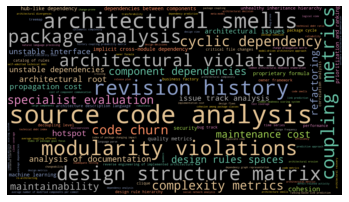

In [31]:
# Generate the WordCloud of methods
util.generateWordcloudFromFrequencies(my_methods, 'atdmethods')

In [42]:
list_of_most_used_method = my_methods.most_common()

counter_of_most_used_method = Counter()

for item in list_of_most_used_method:
    counter_of_most_used_method[item[0]] = item[1]

# Mostra os metodos mais frequentes em ordem decrescente
counter_of_most_used_method.most_common()

[('source code analysis', 16),
 ('architectural smells', 11),
 ('modularity violations', 10),
 ('revision history', 10),
 ('design structure matrix', 9),
 ('coupling metrics', 8),
 ('package analysis', 8),
 ('architectural violations', 7),
 ('cyclic dependency', 7),
 ('code churn', 6),
 ('complexity metrics', 6),
 ('specialist evaluation', 6),
 ('component dependencies', 5),
 ('design rules spaces', 5),
 ('maintainability', 5),
 ('maintenance cost', 5),
 ('refactoring', 5),
 ('analysis of documentation', 4),
 ('architectural root', 4),
 ('hotspot', 4),
 ('issue track analysis', 4),
 ('propagation cost', 4),
 ('unstable dependencies', 4),
 ('unstable interface', 4),
 ('architectural issues', 3),
 ('cohesion', 3),
 ('dependencies between components', 3),
 ('hub-like dependency', 3),
 ('implicit cross-module dependency', 3),
 ('machine learning', 3),
 ('prioritization and ranking', 3),
 ('proprietary formula', 3),
 ('quality metrics', 3),
 ('security', 3),
 ('unhealthy inheritance hierarc

In [43]:
from collections import defaultdict
category_of_methods = defaultdict(list)

category_of_methods['the method appears more 15 times'] = list()
category_of_methods['the method appears until 10 times'] = list()
category_of_methods['the method appears until 5 times'] = list()
category_of_methods['the method appears until 4 times'] = list()
category_of_methods['the method appears until 3 times'] = list()
category_of_methods['the method appears until 2 times'] = list()
category_of_methods['the method appears only 1 time'] = list()

for item in counter_of_most_used_method.items():
    if (item[1] <= 1):
        category_of_methods['the method appears only 1 time'].append(item[0])
    if (item[1] == 2):
        category_of_methods['the method appears until 2 times'].append(item[0])
    if (item[1] == 3):
        category_of_methods['the method appears until 3 times'].append(item[0])
    if (item[1] == 4):
        category_of_methods['the method appears until 4 times'].append(item[0])
    if (item[1]>4 and item[1]<=10):
        category_of_methods['the method appears until 5 times'].append(item[0])
    if (item[1]>10 and item[1]<=15):
        category_of_methods['the method appears until 10 times'].append(item[0])
    if (item[1]>15):
        category_of_methods['the method appears more 15 times'].append(item[0])

categories = []
count = []
kind_of_method = []

for each in category_of_methods.items():
    categories.append(each[0])
    count.append( len(each[1]) )
    kind_of_method.append(each[1])

In [44]:
my_categories = {'categories': categories, 'count':count, 'kind_of_method': kind_of_method}
my_categories_id = list(range(1,len(categories)+1))

pd.set_option('display.max_colwidth', 2000)
df_my_detailed_methods = pd.DataFrame(data=my_categories, index=my_categories_id)
df_my_detailed_methods.reset_index(drop=True, inplace=True)

# Save the latex table 
util.create_latex_table(my_df=df_my_detailed_methods, my_path='../../latex', my_file_name='mytable_q4_methods_detailed.tex')
util.create_markdown_table(my_df=df_my_detailed_methods, my_path='../../md', my_file_name='mytable_q4_methods_detailed.md')
df_my_detailed_methods

Arquivo ../../latex/mytable_q4_methods_detailed.tex  gerado com sucesso!
Arquivo ../../md/mytable_q4_methods_detailed.md  gerado com sucesso!


,categories,count,kind_of_method
0,the method appears more 15 times,1,[source code analysis]
1,the method appears until 10 times,1,[architectural smells]
2,the method appears until 5 times,15,"[modularity violations, revision history, design structure matrix, coupling metrics, package analysis, architectural violations, cyclic dependency, code churn, complexity metrics, specialist evaluation, component dependencies, design rules spaces, maintainability, maintenance cost, refactoring]"
3,the method appears until 4 times,7,"[analysis of documentation, architectural root, hotspot, issue track analysis, propagation cost, unstable dependencies, unstable interface]"
4,the method appears until 3 times,11,"[architectural issues, cohesion, dependencies between components, hub-like dependency, implicit cross-module dependency, machine learning, prioritization and ranking, proprietary formula, quality metrics, security, unhealthy inheritance hierarchy]"
5,the method appears until 2 times,15,"[architecture description language, bug track, business factory, catalog of rules, clique, correlation analysis, critical file changes, decoupling level, design rule hierarchy, owner framework, package cycle, performance, reverse engineering of implemented architecture, time series, treemap]"
6,the method appears only 1 time,67,"[architectural complexity, architectural decision, architectural divergences, architectural erosion, architectural metrics, architectural recovery, architecture smells, average coupling afferent, average number of modified components per commit, bug-prone, change frequency, change propagation metric, change-prone, changeability, clone coverage, code metrics, code smells, cohesion among package classes, common architectural weakness enumeration, common vulerability scoring system, common weakness scoring system, cost of component communcation, crossing, cyclomatic complexity, defect-related activity, dependency analysis, dependency graph representation, dependency prediction, design decisions, design flaws, design metrics, design view, duplicate code, efficiency, history coupling probability matrix, implementation cost, inadequate testing, index of package changing impact, index of package goal focus, jaccard similarity index, language parse, large components, link prediction, logical view, meta-model, microservices, model-driven architecture approach, natural language processing, outdated libraries, owner formula, package cohesion, package coupling, package dependencies, predictive approach, quamoco, ranking-based link prediction, re-architecting, release plan, reliability, robustness, self-admitted technical debt, social network analysis, software architecture documentation, technical debt index, technical debt ratio, test coverage, transferability]"


In [45]:
pd.set_option('display.max_colwidth', 255)
df_my_detailed_methods = pd.DataFrame(data=my_categories, index=my_categories_id)
df_my_detailed_methods.reset_index(drop=True, inplace=True)

# Save the latex table 
util.create_latex_table(my_df=df_my_detailed_methods, my_path='../../latex', my_file_name='mytable_q4_methods_detailed_simple.tex')

df_my_detailed_methods

Arquivo ../../latex/mytable_q4_methods_detailed_simple.tex  gerado com sucesso!


,categories,count,kind_of_method
0,the method appears more 15 times,1,[source code analysis]
1,the method appears until 10 times,1,[architectural smells]
2,the method appears until 5 times,15,"[modularity violations, revision history, design structure matrix, coupling metrics, package analysis, architectural violations, cyclic dependency, code churn, complexity metrics, specialist evaluation, component dependencies, design rules spaces, mai..."
3,the method appears until 4 times,7,"[analysis of documentation, architectural root, hotspot, issue track analysis, propagation cost, unstable dependencies, unstable interface]"
4,the method appears until 3 times,11,"[architectural issues, cohesion, dependencies between components, hub-like dependency, implicit cross-module dependency, machine learning, prioritization and ranking, proprietary formula, quality metrics, security, unhealthy inheritance hierarchy]"
5,the method appears until 2 times,15,"[architecture description language, bug track, business factory, catalog of rules, clique, correlation analysis, critical file changes, decoupling level, design rule hierarchy, owner framework, package cycle, performance, reverse engineering of implem..."
6,the method appears only 1 time,67,"[architectural complexity, architectural decision, architectural divergences, architectural erosion, architectural metrics, architectural recovery, architecture smells, average coupling afferent, average number of modified components per commit, bug-p..."


In [46]:
df_my_detailed_methods['sp'] = None
df_my_detailed_methods[['kind_of_method', 'sp']]

,kind_of_method,sp
0,[source code analysis],None
1,[architectural smells],None
2,"[modularity violations, revision history, design structure matrix, coupling metrics, package analysis, architectural violations, cyclic dependency, code churn, complexity metrics, specialist evaluation, component dependencies, design rules spaces, mai...",None
3,"[analysis of documentation, architectural root, hotspot, issue track analysis, propagation cost, unstable dependencies, unstable interface]",None
4,"[architectural issues, cohesion, dependencies between components, hub-like dependency, implicit cross-module dependency, machine learning, prioritization and ranking, proprietary formula, quality metrics, security, unhealthy inheritance hierarchy]",None
5,"[architecture description language, bug track, business factory, catalog of rules, clique, correlation analysis, critical file changes, decoupling level, design rule hierarchy, owner framework, package cycle, performance, reverse engineering of implem...",None
6,"[architectural complexity, architectural decision, architectural divergences, architectural erosion, architectural metrics, architectural recovery, architecture smells, average coupling afferent, average number of modified components per commit, bug-p...",None


In [47]:
i = 0
for each_list in df_my_detailed_methods['kind_of_method']:
    for item in each_list: 
        for elemento in list_tuple_my_methods_with_paper_id:   
            if item == elemento[0]:
                for j in range(0,56):
                    if (df_sms_extraction['Paper Id'].iloc[j] == elemento[1]):
                        print('ENCONTREI O ELEMENTO!' + elemento[0] + ' de Paper Id: ' + str(elemento[1]) + ' e ' + df_sms_extraction['sp'].iloc[j])

ENCONTREI O ELEMENTO!source code analysis de Paper Id: 81 e SP40
ENCONTREI O ELEMENTO!source code analysis de Paper Id: 24 e SP37
ENCONTREI O ELEMENTO!source code analysis de Paper Id: 51 e SP28
ENCONTREI O ELEMENTO!source code analysis de Paper Id: 78 e SP39
ENCONTREI O ELEMENTO!source code analysis de Paper Id: 15 e SP11
ENCONTREI O ELEMENTO!source code analysis de Paper Id: 90 e SP43
ENCONTREI O ELEMENTO!source code analysis de Paper Id: 2 e SP2
ENCONTREI O ELEMENTO!source code analysis de Paper Id: 27 e SP16
ENCONTREI O ELEMENTO!source code analysis de Paper Id: 20 e SP21
ENCONTREI O ELEMENTO!source code analysis de Paper Id: 4 e SP4
ENCONTREI O ELEMENTO!source code analysis de Paper Id: 73 e SP31
ENCONTREI O ELEMENTO!source code analysis de Paper Id: 13 e SP9
ENCONTREI O ELEMENTO!source code analysis de Paper Id: 43 e SP27
ENCONTREI O ELEMENTO!source code analysis de Paper Id: 7 e SP6
ENCONTREI O ELEMENTO!source code analysis de Paper Id: 48 e SP19
ENCONTREI O ELEMENTO!source code

In [48]:
# 5) Add new column with Selected Papers according grouped tools
i = 0
for each_list in df_my_detailed_methods['kind_of_method']:
    list_sp_novo = list()
    for item in each_list:
        for elemento in list_tuple_my_methods_with_paper_id:
            if item == elemento[0]: 
                for j in range(0,56):
                    if (df_sms_extraction['Paper Id'].iloc[j] == elemento[1]):
                        list_sp_novo.append(df_sms_extraction['sp'].iloc[j]) #list_sp_novo.append(df_sms_extraction['sp'].iloc[j])
        df_my_detailed_methods['sp'].iloc[i] = list_sp_novo
    i = i + 1

# 6) Save the latex table 
util.create_latex_table(my_df=df_my_detailed_methods, my_path='../../latex', my_file_name='mytable_q4_methods_detailed_with_sp.tex')

# 7) Save the markdown table
util.create_markdown_table(my_df=df_my_detailed_methods, my_path='../../md', my_file_name='mytable_q4_methods_detailed_with_sp.md')

df_my_detailed_methods

Arquivo ../../latex/mytable_q4_methods_detailed_with_sp.tex  gerado com sucesso!
Arquivo ../../md/mytable_q4_methods_detailed_with_sp.md  gerado com sucesso!


,categories,count,kind_of_method,sp
0,the method appears more 15 times,1,[source code analysis],"[SP40, SP37, SP28, SP39, SP11, SP43, SP2, SP16, SP21, SP4, SP31, SP9, SP27, SP6, SP19, SP24]"
1,the method appears until 10 times,1,[architectural smells],"[SP3, SP26, SP18, SP9, SP28, SP4, SP21, SP13, SP17, SP5, SP37]"
2,the method appears until 5 times,15,"[modularity violations, revision history, design structure matrix, coupling metrics, package analysis, architectural violations, cyclic dependency, code churn, complexity metrics, specialist evaluation, component dependencies, design rules spaces, mai...","[SP4, SP19, SP3, SP9, SP2, SP24, SP16, SP22, SP5, SP27, SP21, SP2, SP40, SP24, SP6, SP28, SP9, SP4, SP16, SP19, SP39, SP18, SP9, SP4, SP19, SP22, SP5, SP37, SP27, SP39, SP5, SP2, SP9, SP27, SP24, SP44, SP37, SP3, SP28, SP5, SP11, SP13, SP4, SP22, SP24..."
3,the method appears until 4 times,7,"[analysis of documentation, architectural root, hotspot, issue track analysis, propagation cost, unstable dependencies, unstable interface]","[SP10, SP9, SP40, SP43, SP5, SP19, SP4, SP37, SP10, SP19, SP6, SP9, SP48, SP19, SP6, SP27, SP22, SP5, SP39, SP18, SP3, SP28, SP21, SP13, SP19, SP5, SP4, SP9]"
4,the method appears until 3 times,11,"[architectural issues, cohesion, dependencies between components, hub-like dependency, implicit cross-module dependency, machine learning, prioritization and ranking, proprietary formula, quality metrics, security, unhealthy inheritance hierarchy]","[SP5, SP9, SP19, SP2, SP24, SP27, SP19, SP27, SP43, SP21, SP3, SP28, SP4, SP19, SP3, SP1, SP21, SP48, SP26, SP9, SP21, SP40, SP25, SP22, SP40, SP44, SP31, SP31, SP40, SP55, SP9, SP19, SP4]"
5,the method appears until 2 times,15,"[architecture description language, bug track, business factory, catalog of rules, clique, correlation analysis, critical file changes, decoupling level, design rule hierarchy, owner framework, package cycle, performance, reverse engineering of implem...","[SP11, SP10, SP27, SP9, SP19, SP40, SP31, SP40, SP5, SP4, SP28, SP24, SP16, SP27, SP18, SP5, SP37, SP19, SP44, SP31, SP4, SP5, SP25, SP40, SP10, SP43, SP26, SP21, SP39, SP25]"
6,the method appears only 1 time,67,"[architectural complexity, architectural decision, architectural divergences, architectural erosion, architectural metrics, architectural recovery, architecture smells, average coupling afferent, average number of modified components per commit, bug-p...","[SP39, SP1, SP43, SP44, SP39, SP43, SP19, SP24, SP7, SP6, SP4, SP22, SP6, SP40, SP44, SP26, SP13, SP24, SP31, SP31, SP31, SP25, SP5, SP44, SP27, SP22, SP21, SP21, SP27, SP24, SP26, SP25, SP44, SP25, SP9, SP22, SP44, SP7, SP7, SP28, SP40, SP44, SP21, S..."
